# Bibliotecas

In [ ]:
# Dados
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos
from sklearn.linear_model import LinearRegression #modelo de análise
from sklearn.model_selection import train_test_split #treino de teste

# Métricas
from sklearn import metrics
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import confusion_matrix

# Estudo de Caso

In [ ]:
pd.set_option('display.max_columns', None) #Estabelece que não há número máximo de colunas específico para aparecer na tela

## Leitura Inicial dos Dados:

In [ ]:
df_cervejas = pd.read_csv('consumo_cerveja.csv', sep=';')

df_cervejas

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


In [ ]:
print('Tamanho:',df_cervejas.shape, '\n')
print(df_cervejas.info())

Tamanho: (365, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   data        365 non-null    object 
 1   temp_media  365 non-null    float64
 2   temp_min    365 non-null    float64
 3   temp_max    365 non-null    float64
 4   chuva       365 non-null    float64
 5   fds         365 non-null    int64  
 6   consumo     365 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB
None


In [ ]:
df_cervejas.isna().any() # Verifica se há algum NaN no DataFrame, caso tenha retorna True. Caso contrário, retorna False.

data          False
temp_media    False
temp_min      False
temp_max      False
chuva         False
fds           False
consumo       False
dtype: bool

In [ ]:
df_cervejas.describe().round(2) # Retorna uma análise estatistíca sobre o conjunto de dados.

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [ ]:
consumo_min = df_cervejas[df_cervejas['consumo'] == 14343]
consumo_max = df_cervejas[df_cervejas['consumo'] == 37937]

print('Mínimo:\n', consumo_min,'\n')
print('Máximo:\n', consumo_max)

Mínimo:
            data  temp_media  temp_min  temp_max  chuva  fds  consumo
202  22/07/2015       14.52      12.8      16.1    0.0    0    14343 

Máximo:
          data  temp_media  temp_min  temp_max  chuva  fds  consumo
9  10/01/2015       26.76      22.1      34.2    0.0    1    37937


### Consumo x Tempo (Gráfico)

(0.0, 364.0)

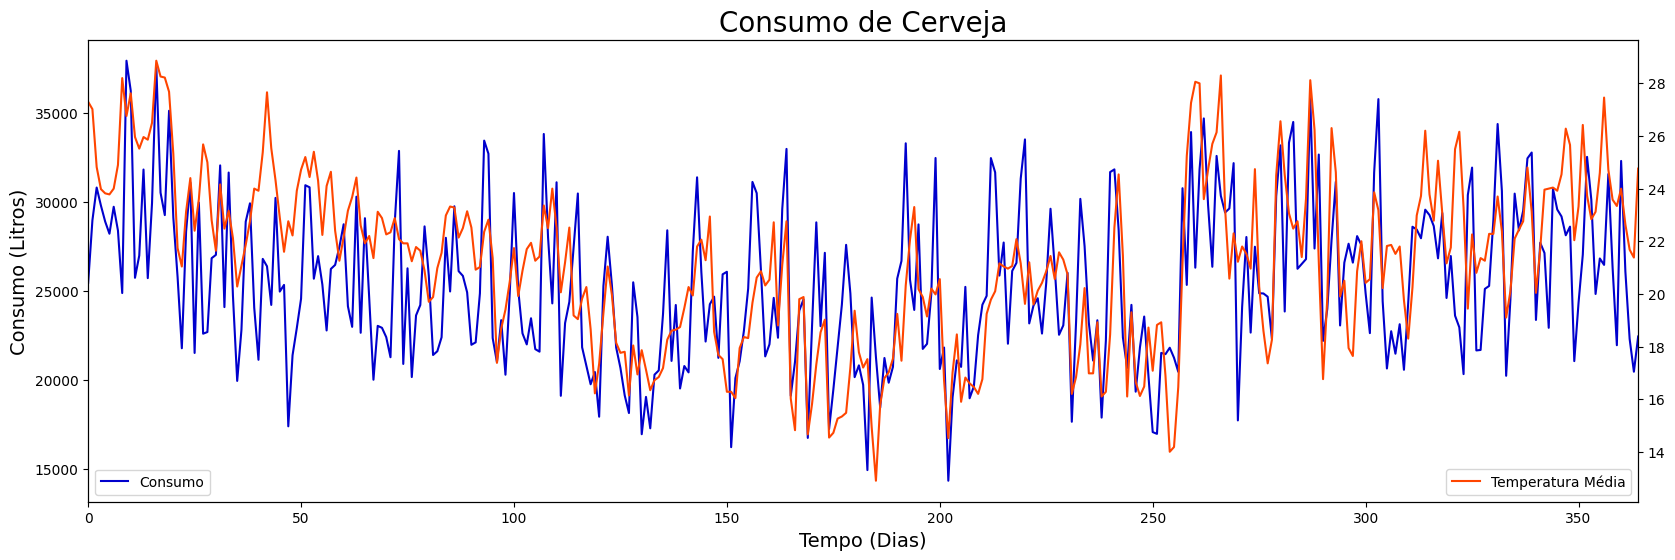

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Consumo de Cerveja', fontsize=20)

ax.set_xlabel('Tempo (Dias)', fontsize=14)
ax.set_ylabel('Consumo (Litros)', fontsize=14)

ax.plot(df_cervejas['consumo'], label='Consumo', color='mediumblue')
ax.legend(loc='lower left')

ax2 = ax.twinx()
ax2.plot(df_cervejas['temp_media'], label = 'Temperatura Média', color='orangered')
ax2.legend(loc='lower right')

ax.set_xlim(0, 364) # Intervalo do Gráfico

### Consumo de Cerveja (Boxplot)

Text(0, 0.5, 'Cerveja (L)')

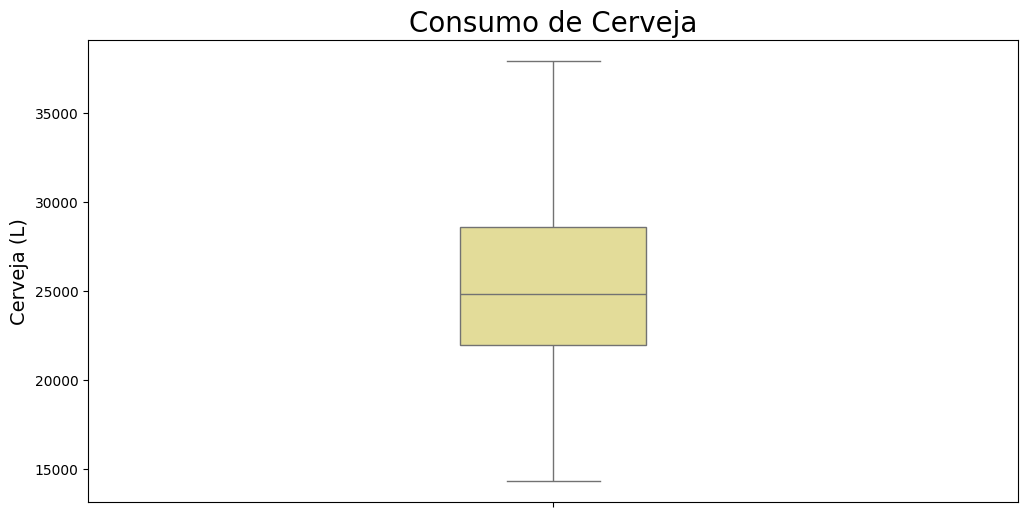

In [ ]:
ax = sns.boxplot(data=df_cervejas['consumo'], orient='v', width=0.2, color='khaki')

ax.figure.set_size_inches(12,6)

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Cerveja (L)', fontsize=14)

#### Verificando Outliers

<ipython-input-18-79b8d7297907>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Dias da Semana', 'Final de Semana'])


[Text(0, 0, 'Dias da Semana'), Text(1, 0, 'Final de Semana')]

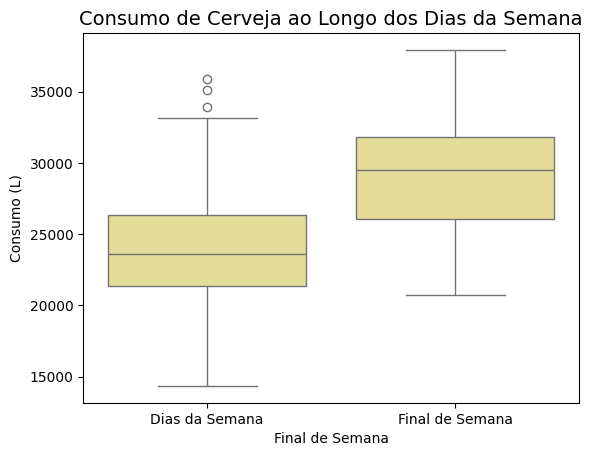

In [ ]:
fig, ax = plt.subplots()

sns.boxplot(x='fds', y='consumo', data=df_cervejas, ax=ax, color='khaki')

ax.set_title('Consumo de Cerveja ao Longo dos Dias da Semana', fontsize=14)
ax.set_xlabel('Final de Semana')
ax.set_ylabel('Consumo (L)')

ax.set_xticklabels(['Dias da Semana', 'Final de Semana'])

### Consumo x Frequência (Histograma)

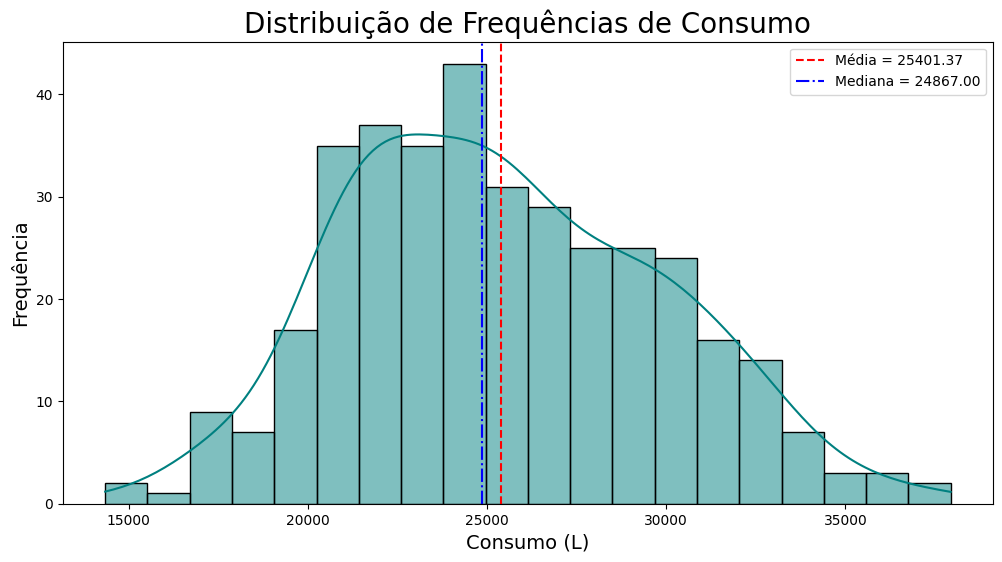

In [ ]:
ax = sns.histplot(df_cervejas['consumo'], kde=True, bins=20, color='teal') # A gaussiana é colocada com o comando kde.

ax.figure.set_size_inches(12,6)

ax.set_title('Distribuição de Frequências de Consumo', fontsize=20)

ax.set_xlabel('Consumo (L)', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14)

media = df_cervejas['consumo'].mean()
plt.axvline(media, color='red', linestyle='--', label=f'Média = {media:.2f}')

mediana = df_cervejas['consumo'].median()
plt.axvline(mediana, color='blue', linestyle='-.', label=f'Mediana = {mediana:.2f}')

plt.legend()

## Limpando/Modelando os Dados

In [ ]:
df_cervejas.head(5)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [ ]:
df_semdata = df_cervejas.drop('data', axis=1) # Retirando features (colunas) sem relevância.

df_semdata

,temp_media,temp_min,temp_max,chuva,fds,consumo
0,27.30,23.9,32.5,0.0,0,25461
1,27.02,24.5,33.5,0.0,0,28972
2,24.82,22.4,29.9,0.0,1,30814
3,23.98,21.5,28.6,1.2,1,29799
4,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...
360,24.00,21.1,28.2,13.6,1,32307
361,22.64,21.1,26.7,0.0,0,26095
362,21.68,20.3,24.1,10.3,0,22309
363,21.38,19.3,22.4,6.3,0,20467


## Calculando a Correlação e Dispersão de Dados

In [ ]:
df_semdata.corr().round(2) # Tabela de Correlação de Dados

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.00,0.86,0.92,0.02,-0.05,0.57
temp_min,0.86,1.00,0.67,0.10,-0.06,0.39
temp_max,0.92,0.67,1.00,-0.05,-0.04,0.64
chuva,0.02,0.10,-0.05,1.00,0.00,-0.19
fds,-0.05,-0.06,-0.04,0.00,1.00,0.51
consumo,0.57,0.39,0.64,-0.19,0.51,1.00


Text(0.5, 1.0, 'Correlação das Features de Cerveja')

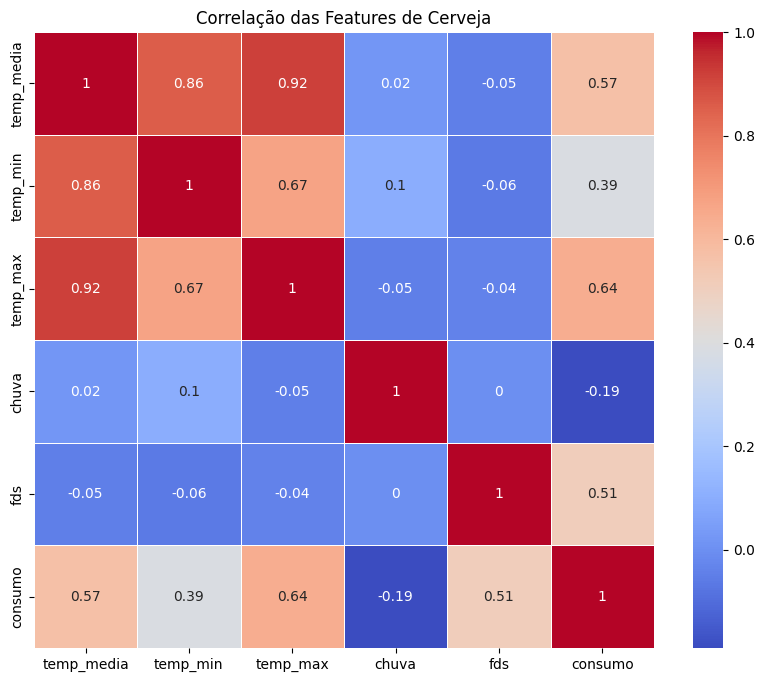

In [ ]:
matriz_de_corr = df_semdata.corr().round(2)

plt.figure(figsize=(10,8))
sns.heatmap(matriz_de_corr, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlação das Features de Cerveja')

## Regressão Linear dos Dados Observados

Text(0.5, 1.1, 'Dispersão entre Features x Consumo')

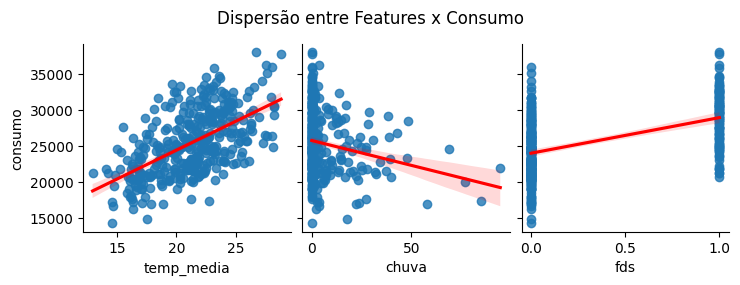

In [ ]:
ax = sns.pairplot(df_semdata,
                  y_vars='consumo',
                  x_vars=['temp_media',
                          'chuva',
                          'fds'],
                  kind='reg',
                  plot_kws={'line_kws': {'color': 'red'}}
                  )

ax.fig.suptitle('Dispersão entre Features x Consumo', y=1.1)

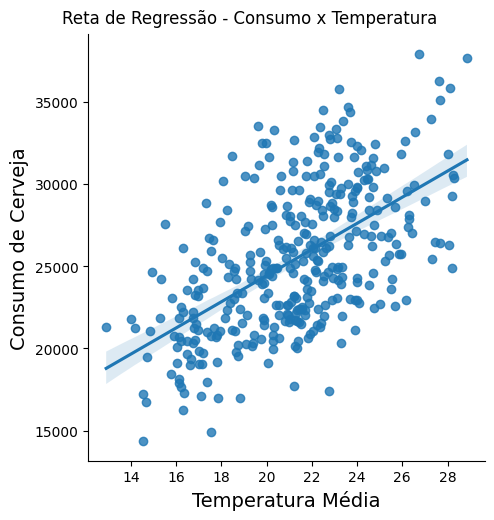

In [ ]:
ax = sns.lmplot(x='temp_media', y='consumo', data=df_semdata)

ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura', y=1.02)
ax.set_xlabels('Temperatura Média', fontsize=14)
ax.set_ylabels('Consumo de Cerveja', fontsize=14)

## Criando o Modelo de Análise

In [ ]:
x = df_semdata[['temp_media', 'chuva', 'fds']]
y = df_semdata['consumo']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42) # Treina o modelo com 80% dos dados e testa com os outros 20%.
                                                    # Random_State é a aleatoriedade que os dados serão pegos. (Funciona como uma marca pessoal)

x_train.shape, x_test.shape # 80/20 ==> 292/73

((292, 3), (73, 3))

In [ ]:
modelo = LinearRegression() # Definição de Modelo

In [ ]:
modelo.fit(x_train, y_train) #Treino de Modelo

LinearRegression()

In [ ]:
previsao = modelo.predict(x_test) # Modelo de Previsão com a porcentagem de teste
r2 = r2_score(y_test, previsao)
print(f'Coeficiente de Determinação: {r2:.2f}') # Compatibilidade do Teste com o Modelo

Coeficiente de Determinação: 0.68


In [37]:
# Utilizando o Modelo testado com teste definidos pelo usuário

temp_dia = int(input('Qual será a temperatura média (em °C) do dia?: '))
chuva = int(input('Quantos milímetros choverá no dia?: '))

while True:
  fds = input('Será final de semana? Responda S (sim) ou N (não): ')
  if fds == 'S' or fds == 's' or fds == 'sim':
    fds = 1
    break
  elif fds == 'N' or fds == 'n' or fds == 'não':
    fds = 0
    break
  else:
    print('Entrada Inválida! Tente Novamente.')
    continue

entrada = [[temp_dia, chuva, fds]]

print(f'Deverão ser produzidos {modelo.predict(entrada)[0].round(2)} litros de Cerveja')

Qual será a temperatura média (em °C) do dia?: 23
Quantos milímetros choverá no dia?: 3
Será final de semana? Responda S (sim) ou N (não): sim
Deverão ser produzidos 30684.14 litros de Cerveja


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
